In [1]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [2]:

from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model

In [3]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

In [4]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'D:\DESKTOP\Machine Learning\Web_App\Brain_tumor\brain_tumor_dataset\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [5]:
paths = []
for r, d, f in os.walk(r"D:\DESKTOP\Machine Learning\Web_App\Brain_tumor\brain_tumor_dataset\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [6]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
result = np.array(result)
result = result.reshape(139,2)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [9]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 7s 2s/step - loss: 33.1250 - val_loss: 68.5000
Epoch 2/30
3/3 [==============================] - 4s 2s/step - loss: 24.2281 - val_loss: 23.3983
Epoch 3/30
3/3 [==============================] - 5s 1s/step - loss: 7.4604 - val_loss: 27.1527
Epoch 4/30
3/3 [==============================] - 4s 1s/step - loss: 6.0127 - val_loss: 19.3131
Epoch 5/30
3/3 [==============================] - 4s 1s/step - loss: 2.2089 - val_loss: 12.8103
Epoch 6/30
3/3 [==============================] - 5s 2s/step - loss: 1.3519 - val_loss: 15.8574
Epoch 7/30
3/3 [==============================] - 5s 2s/step - loss: 1.0927 - val_loss: 21.1393
Epoch 8/30
3/3 [==============================] - 5s 2s/step - loss: 0.5969 - val_loss: 20.8570
Epoch 9/30
3/3 [==============================] - 5s 2s/step - loss: 0.3348 - val_loss: 18.9627
Epoch 10/30
3/3 [==============================] - 5s 2s/step - loss: 0.1445 - val_loss: 15.7764
Epoch 11/30
3/3 [====================

In [11]:
def names(number):
    if number == 0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'
def timeleft(number):
    if (number<=15):
        return 'The 5-Year survival rate is around 75%'
    elif (number>15 and number<=39):
        return 'The 5-Year survival rate is around 70%'
    elif (number>39 and number<=50):
        return 'The 5-Year survival rate is around 54%'
    else:
        return 'The 5-Year survival rate is around 21%'

95.0% This Is No, Its not a tumor


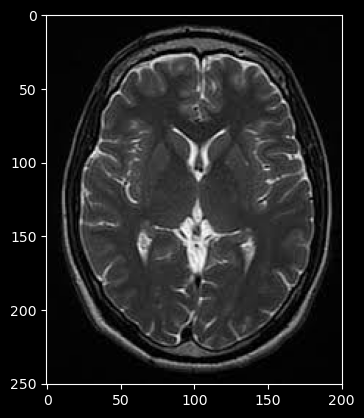

In [12]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\DESKTOP\Machine Learning\Web_App\Brain_tumor\brain_tumor_dataset\no\8 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*95) + '% This Is ' + names(classification))

95.0% This Is A Its a Tumor
The 5-Year survival rate is around 70%


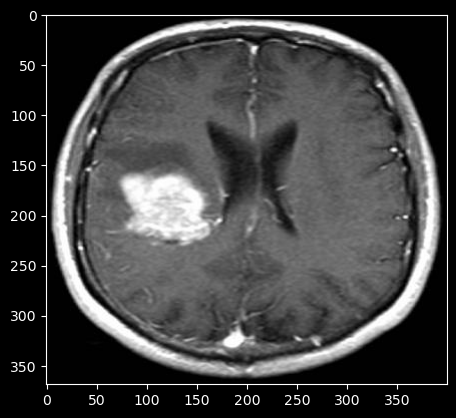

In [14]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\DESKTOP\Machine Learning\Web_App\Brain_tumor\brain_tumor_dataset\yes/Y11.jpg")
age = 35
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*95) + '% This Is A ' + names(classification))
print(timeleft(age))